In [1]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import tensorflow as tf
import MIDASpy as md
import math


In [2]:
column_names=['column 1','column 2','column 3','column 4','column 5','column 6','column 7','column 8','column 9','column 10','column 11','column 12','column 13','column 14','column 15','column 16','column 17','column 18','column 19','column 20','column 21','column 22','column 23','column 30','column 25','column 26','column 27','column 28','column 29','column 30','column 31','column 32','column 33','column 34','column 35','column 36','column 37','column 38','column 39','column 40','column 41','column 42','column 43','column 44','column 45','column 46','column 47','column 48','column 49','column 50','column 51','column 52','column 53','column 54','column 55','column 56','column 57','column 58','column 59','column 60']
df=pd.read_excel(r'C:\Users\Jaber Shahnawaz\Downloads\Incomplete Datasets\Incomplete Datasets Without Labels\Sonar\Sonar_AL_5.xlsx.', header=None,names=column_names)
df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,...,column 51,column 52,column 53,column 54,column 55,column 56,column 57,column 58,column 59,column 60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0232,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0125,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0033,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,NaN,...,0.0241,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0156,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,0.0187,0.0346,0.0168,0.0177,0.0393,0.1630,0.2028,0.1694,0.2328,0.2684,...,0.0203,0.0116,0.0098,0.0199,0.0033,0.0101,0.0065,0.0115,0.0193,0.0157
204,0.0323,0.0101,0.0298,0.0564,0.0760,0.0958,0.0990,0.1018,0.1030,0.2154,...,0.0051,0.0061,0.0093,0.0135,0.0063,0.0063,0.0034,0.0032,0.0062,0.0067
205,0.0522,0.0437,0.0180,0.0292,0.0351,0.1171,0.1257,0.1178,0.1258,0.2529,...,0.0155,0.0160,0.0029,0.0051,0.0062,0.0089,0.0140,0.0138,0.0077,0.0031
206,0.0303,0.0353,0.0490,0.0608,0.0167,0.1354,0.1465,0.1123,0.1945,0.2354,...,0.0042,0.0086,0.0046,0.0126,0.0036,0.0035,0.0034,0.0079,0.0036,0.0048


In [3]:
print('dataType',end='\t')
print('column_names',end='\t')
print('Number of Nulls')
for name in column_names:
    print(df[name].dtype,end='\t\t')
    print(name,end='\t')
    print(df[name].isnull().sum())

dataType	column_names	Number of Nulls
float64		column 1	0
float64		column 2	0
float64		column 3	0
float64		column 4	0
float64		column 5	0
float64		column 6	0
float64		column 7	0
float64		column 8	0
float64		column 9	20
float64		column 10	20
float64		column 11	20
float64		column 12	0
float64		column 13	0
float64		column 14	20
float64		column 15	20
float64		column 16	20
float64		column 17	40
float64		column 18	40
float64		column 19	40
float64		column 20	20
float64		column 21	40
float64		column 22	0
float64		column 23	40
float64		column 30	0
float64		column 25	20
float64		column 26	0
float64		column 27	20
float64		column 28	0
float64		column 29	20
float64		column 30	0
float64		column 31	0
float64		column 32	0
float64		column 33	0
float64		column 34	20
float64		column 35	20
float64		column 36	20
float64		column 37	40
float64		column 38	0
float64		column 39	0
float64		column 40	0
float64		column 41	0
float64		column 42	0
float64		column 43	0
float64		column 44	0
float64		column 45	20
float6

In [4]:
df.describe()

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,...,column 51,column 52,column 53,column 54,column 55,column 56,column 57,column 58,column 59,column 60
count,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,188.000000,188.000000,...,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000
mean,0.029164,0.038437,0.043832,0.053892,0.075202,0.104570,0.121747,0.134799,0.179594,0.210859,...,0.016069,0.013420,0.010709,0.010941,0.009290,0.008222,0.007820,0.007949,0.007941,0.006507
std,0.022991,0.032960,0.038428,0.046528,0.055552,0.059105,0.061788,0.085152,0.122297,0.136767,...,0.012008,0.009634,0.007060,0.007301,0.007088,0.005736,0.005785,0.006470,0.006181,0.005031
min,0.001500,0.000600,0.001500,0.005800,0.006700,0.010200,0.003300,0.005500,0.007500,0.011300,...,0.000000,0.000800,0.000500,0.001000,0.000600,0.000400,0.000300,0.000300,0.000100,0.000600
25%,0.013350,0.016450,0.018950,0.024375,0.038050,0.067025,0.080900,0.080425,0.097025,0.109600,...,0.008425,0.007275,0.005075,0.005375,0.004150,0.004400,0.003700,0.003600,0.003675,0.003100
50%,0.022800,0.030800,0.034300,0.044050,0.062500,0.092150,0.106950,0.112100,0.152250,0.185000,...,0.013900,0.011400,0.009550,0.009300,0.007500,0.006850,0.005950,0.005800,0.006400,0.005300
75%,0.035550,0.047950,0.057950,0.064500,0.100275,0.134125,0.154000,0.169600,0.230850,0.271850,...,0.020825,0.016725,0.014900,0.014500,0.012100,0.010575,0.010425,0.010350,0.010325,0.008525
max,0.137100,0.233900,0.305900,0.426400,0.401000,0.382300,0.372900,0.459000,0.682800,0.710600,...,0.100400,0.070900,0.039000,0.035200,0.044700,0.039400,0.035500,0.044000,0.036400,0.043900


<AxesSubplot:>

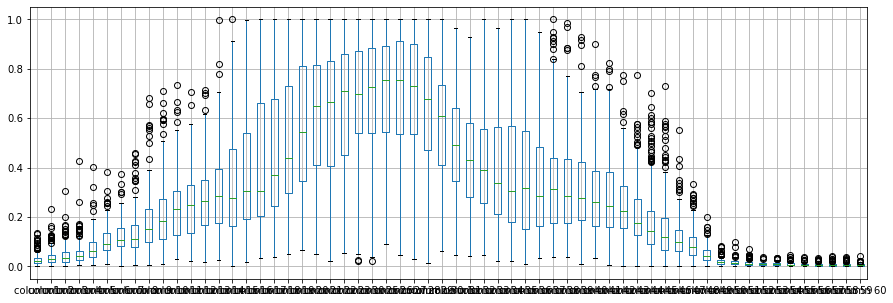

In [5]:
df.boxplot(return_type='axes', figsize=(15,5))

In [6]:
df.mean()

column 1       0.029164
column 2       0.038437
column 3       0.043832
column 4       0.053892
column 5       0.075202
column 6       0.104570
column 7       0.121747
column 8       0.134799
column 9       0.179594
column 10      0.210859
column 11      0.241216
column 12      0.250221
column 13      0.273305
column 14      0.299239
column 15      0.324981
column 16      0.379070
column 17      0.418470
column 18      0.455281
column 19      0.504693
column 20      0.565404
column 21      0.616877
column 22      0.624275
column 23      0.653107
column 30      0.672654
column 25      0.681480
column 26      0.699866
column 27      0.704389
column 28      0.694024
column 29      0.643136
column 30.1    0.580928
column 31      0.504475
column 32      0.439040
column 33      0.417220
column 34      0.390468
column 35      0.385726
column 36      0.379058
column 37      0.355819
column 38      0.339657
column 39      0.325800
column 40      0.311207
column 41      0.289252
column 42      0

In [7]:
corr=df.corr()
corr

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,...,column 51,column 52,column 53,column 54,column 55,column 56,column 57,column 58,column 59,column 60
column 1,1.000000,0.735896,0.571537,0.491438,0.344797,0.238921,0.260815,0.355523,0.355244,0.302800,...,0.254450,0.355299,0.311729,0.322299,0.312067,0.220642,0.313725,0.368132,0.357116,0.347078
column 2,0.735896,1.000000,0.779916,0.606684,0.419669,0.332329,0.279040,0.334615,0.322039,0.266737,...,0.320538,0.434548,0.346076,0.383960,0.380165,0.262263,0.280341,0.353042,0.352200,0.358761
column 3,0.571537,0.779916,1.000000,0.781786,0.546141,0.346275,0.190434,0.237884,0.262421,0.214500,...,0.238110,0.394076,0.332914,0.367186,0.289731,0.287661,0.380819,0.334108,0.425047,0.373948
column 4,0.491438,0.606684,0.781786,1.000000,0.726943,0.352805,0.246440,0.246742,0.254067,0.237142,...,0.174676,0.374651,0.364772,0.334211,0.284955,0.280938,0.340254,0.344865,0.420266,0.400626
column 5,0.344797,0.419669,0.546141,0.726943,1.000000,0.597053,0.335422,0.204006,0.179140,0.169480,...,0.115936,0.266617,0.314985,0.205306,0.196472,0.199323,0.219395,0.238793,0.290982,0.253710
column 6,0.238921,0.332329,0.346275,0.352805,0.597053,1.000000,0.702889,0.471683,0.333459,0.296700,...,0.171767,0.252288,0.162404,0.164073,0.133464,0.166758,0.161333,0.203986,0.220573,0.178158
column 7,0.260815,0.279040,0.190434,0.246440,0.335422,0.702889,1.000000,0.675774,0.477665,0.449813,...,0.184152,0.144051,0.046403,0.163074,0.195541,0.174143,0.186324,0.242646,0.183578,0.222493
column 8,0.355523,0.334615,0.237884,0.246742,0.204006,0.471683,0.675774,1.000000,0.789899,0.654265,...,0.260692,0.219038,0.102447,0.234008,0.239551,0.276819,0.267212,0.287603,0.194400,0.146216
column 9,0.355244,0.322039,0.262421,0.254067,0.179140,0.333459,0.477665,0.789899,1.000000,0.890515,...,0.168516,0.208731,0.095555,0.207431,0.186361,0.251250,0.208655,0.231079,0.110871,0.097056
column 10,0.302800,0.266737,0.214500,0.237142,0.169480,0.296700,0.449813,0.654265,0.890515,1.000000,...,0.171804,0.188869,0.124245,0.132344,0.153231,0.148056,0.137399,0.198762,0.030630,0.117180


In [8]:
tf.compat.v1.reset_default_graph()
import tensorflow.compat.v1 as tf
tf.reset_default_graph()


In [9]:
imputer = md.Midas(layer_structure = [60,60+14,60+14+14,60+14+14+14,60+14+14,60+14,60], vae_layer = False, seed = 140)
imputer.build_model(df)
imputer.train_model(training_epochs=100)


Size index: [60]

Computation graph constructed

Model initialised

Epoch: 0 , loss: 17.65992971567007
Epoch: 1 , loss: 17.458226717435398
Epoch: 2 , loss: 17.35433241037222
Epoch: 3 , loss: 17.23222064971924
Epoch: 4 , loss: 17.11401235140287
Epoch: 5 , loss: 17.075450090261604
Epoch: 6 , loss: 16.992002927339993
Epoch: 7 , loss: 16.93873852949876
Epoch: 8 , loss: 16.79272857079139
Epoch: 9 , loss: 16.70850636408879
Epoch: 10 , loss: 16.582084068885216
Epoch: 11 , loss: 16.376447677612305
Epoch: 12 , loss: 16.192682046156662
Epoch: 13 , loss: 15.944730905386118
Epoch: 14 , loss: 15.54270443549523
Epoch: 15 , loss: 14.999151963454027
Epoch: 16 , loss: 14.36774261181171
Epoch: 17 , loss: 13.328476025508
Epoch: 18 , loss: 12.27320883824275
Epoch: 19 , loss: 11.15052083822397
Epoch: 20 , loss: 10.175100840055025
Epoch: 21 , loss: 9.666308036217323
Epoch: 22 , loss: 9.40283415867732
Epoch: 23 , loss: 9.213698387145996
Epoch: 24 , loss: 9.056077590355507
Epoch: 25 , loss: 8.907767369196964


In [10]:
imputations=imputer.generate_samples(m=15).output_list
np.shape(imputations[-1])

INFO:tensorflow:Restoring parameters from tmp/MIDAS
Model restored.


(208, 60)

In [11]:
new_df=imputations[-1]
new_df.iloc[21,:]


column 1       0.066400
column 2       0.057500
column 3       0.084200
column 4       0.037200
column 5       0.045800
column 6       0.077100
column 7       0.077100
column 8       0.113000
column 9       0.135737
column 10      0.183800
column 11      0.186703
column 12      0.412900
column 13      0.364700
column 14      0.198400
column 15      0.245257
column 16      0.403900
column 17      0.298536
column 18      0.325213
column 19      0.364005
column 20      0.416009
column 21      0.444695
column 22      0.201300
column 23      0.475109
column 30      0.168600
column 25      0.248400
column 26      0.273600
column 27      0.298400
column 28      0.465500
column 29      0.699000
column 30.1    0.747400
column 31      0.795600
column 32      0.798100
column 33      0.671500
column 34      0.301493
column 35      0.744000
column 36      0.286203
column 37      0.265397
column 38      1.000000
column 39      0.875300
column 40      0.706100
column 41      0.680300
column 42      0

In [12]:
complete_df=pd.read_excel(r'C:\Users\Jaber Shahnawaz\Downloads\Original Datasets (1)\Original Datasets Without Labels\Sonar.xlsx', header=None,names=column_names)

In [13]:
new_df-complete_df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,...,column 51,column 52,column 53,column 54,column 55,column 56,column 57,column 58,column 59,column 60
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.025857,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
204,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
205,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
206,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Calculating NRMSE Value

In [14]:

def Sum_new(sum):
    summ=0
    for n in sum:
        summ=summ+n
    return (summ)



In [15]:
def Frobenius_norm(number):
    num=number
    abs_val=num.abs()
    power_abs=abs_val**2
    sum1=power_abs.sum()
    total_sum=Sum_new(sum1)
    return(math.sqrt(total_sum))

In [16]:
numerator=Frobenius_norm(new_df-complete_df)
numerator

5.905006985946441

In [17]:
denominator=Frobenius_norm(complete_df)
denominator

44.56104528767251

In [18]:
NRMS=numerator/denominator
NRMS


0.132515001563036

In [19]:
new_df.iloc[66,:]

column 1       0.0265
column 2       0.0440
column 3       0.0137
column 4       0.0084
column 5       0.0305
column 6       0.0438
column 7       0.0341
column 8       0.0780
column 9       0.0844
column 10      0.0779
column 11      0.0327
column 12      0.2060
column 13      0.1908
column 14      0.1065
column 15      0.1457
column 16      0.2232
column 17      0.2070
column 18      0.1105
column 19      0.1078
column 20      0.1165
column 21      0.2224
column 22      0.0689
column 23      0.2060
column 30      0.2384
column 25      0.0904
column 26      0.2278
column 27      0.5872
column 28      0.8457
column 29      0.8467
column 30.1    0.7679
column 31      0.8055
column 32      0.6260
column 33      0.6545
column 34      0.8747
column 35      0.9885
column 36      0.9348
column 37      0.6960
column 38      0.5733
column 39      0.5872
column 40      0.6663
column 41      0.5651
column 42      0.5247
column 43      0.3684
column 44      0.1997
column 45      0.1512
column 46 

In [20]:
imputations[-1]


,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,...,column 51,column 52,column 53,column 54,column 55,column 56,column 57,column 58,column 59,column 60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.211100,...,0.0232,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.287200,...,0.0125,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.619400,...,0.0033,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.152257,...,0.0241,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.445900,...,0.0156,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,0.0187,0.0346,0.0168,0.0177,0.0393,0.1630,0.2028,0.1694,0.2328,0.268400,...,0.0203,0.0116,0.0098,0.0199,0.0033,0.0101,0.0065,0.0115,0.0193,0.0157
204,0.0323,0.0101,0.0298,0.0564,0.0760,0.0958,0.0990,0.1018,0.1030,0.215400,...,0.0051,0.0061,0.0093,0.0135,0.0063,0.0063,0.0034,0.0032,0.0062,0.0067
205,0.0522,0.0437,0.0180,0.0292,0.0351,0.1171,0.1257,0.1178,0.1258,0.252900,...,0.0155,0.0160,0.0029,0.0051,0.0062,0.0089,0.0140,0.0138,0.0077,0.0031
206,0.0303,0.0353,0.0490,0.0608,0.0167,0.1354,0.1465,0.1123,0.1945,0.235400,...,0.0042,0.0086,0.0046,0.0126,0.0036,0.0035,0.0034,0.0079,0.0036,0.0048


In [21]:
imputations[-1].to_excel("Sonar_AL_5(imp).xlsx", index=False, header=False)